In [1]:
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(tidyr))
suppressPackageStartupMessages(library(tibble))
suppressPackageStartupMessages(library(stringr))
library(parallel)
library(pheatmap)
library(RColorBrewer)
library(viridis)
source('/home/jupyter/BRI_Figures_Final_V1/helper_function/helper_function_IHA.r')

Loading required package: viridisLite



In [4]:
save_pheatmap <- function(x, filename, width=12, height=12){
  stopifnot(!missing(x))
  stopifnot(!missing(filename))
  if(grepl(".png",filename)){
    png(filename, width=width, height=height, units = "in", res=300)
    grid::grid.newpage()
    grid::grid.draw(x$gtable)
    dev.off()
  }
  else if(grepl(".pdf",filename)){
    pdf(filename, width=width, height=height)
    grid::grid.newpage()
    grid::grid.draw(x$gtable)
    dev.off()
  }
  else{
    print("Filename did not contain '.png' or '.pdf'")
  }}

In [49]:
meta_data<-read.csv("/home/jupyter/BRI_Figures_Final_V1/Dataset/scRNA_meta_data-2024-05-09.csv")
row.names(meta_data)<-meta_data$pbmc_sample_id

exp_matrix<-read.csv('04_DEG_AgeGroup_CMVneg_vs_CMVpos/exp_matrix_adaptive_nk.csv',check.names = FALSE,
                     row.names=1)
gene_anno<-read.csv('04_DEG_AgeGroup_CMVneg_vs_CMVpos/gene_overlaps.csv',row.names=1)

In [50]:
meta_data_subset<-meta_data[colnames(exp_matrix),]%>% arrange(cohort.cohortGuid,desc(subject.birthYear)) %>% select(cohort.cohortGuid,CMV)

In [51]:
meta_data_subset<-meta_data_subset %>% mutate(cohort.cohortGuid=case_when(cohort.cohortGuid=="BR1"~"Young", TRUE~'Older'))
colnames(meta_data_subset)<-c('Age Group','CMV')

In [52]:
breaks_sequence <- seq(-1, 1, length.out = 100)

In [70]:
ann_colors = list(
  `Age Group` = c(Young="#35978f", Older="#bf812d"),
`CMV` = c(Positive="#d6604d", Negative="#4393c3"),
`Overlap_Info` = c(`Overlap`="#7fc97f", `Only in Young`="#beaed4", `Only in Older`="#fdc086"))

In [71]:
meta_data_subset<-meta_data_subset %>% arrange(desc(`Age Group`),CMV)

png 
  2

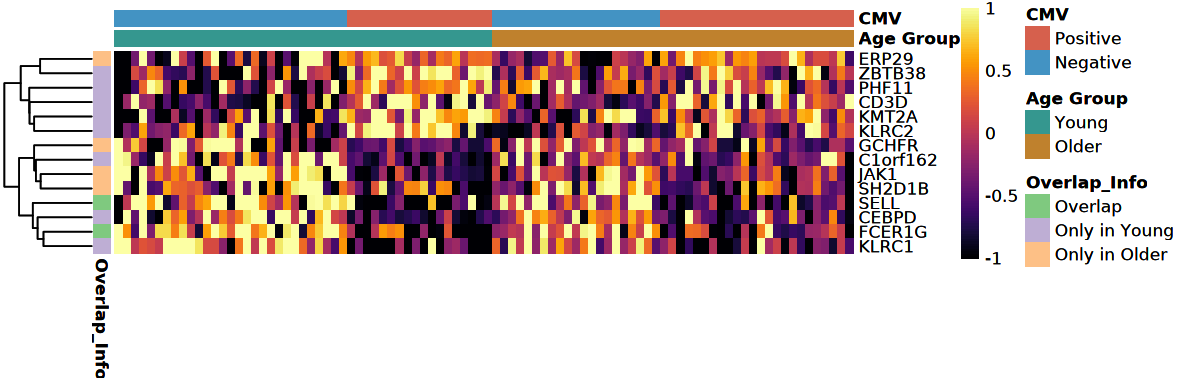

In [73]:
options(repr.plot.width = 250/25.4, repr.plot.height =  80/25.4)

p<-pheatmap(exp_matrix[rownames(meta_data_subset)], 
         breaks=breaks_sequence,
         cluster_rows=TRUE, 
         annotation=meta_data_subset,annotation_row=gene_anno['Overlap_Info'],
         cluster_cols=FALSE,
         annotation_colors = ann_colors,
         show_colnames=FALSE,color= inferno(100),
         border_color=NA,
         scale='row')
p
save_pheatmap(p,'FigureG.pdf', width=200/25.4, height=80/25.4)